<a href="https://colab.research.google.com/github/Yashkhosla06/Inse-6220-projectwork/blob/main/Yash_Final_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dp = pd.read_csv('/content/Pistachio.csv')
dp.head(n=25)

ECCENTRICITY  SOLIDITY  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0         0.7951    0.8665  0.6394        1.6488     0.3238       0.7278   
1         0.8207    0.8765  0.6772        1.7502     0.2277       0.7181   
2         0.8731    0.9172  0.7127        2.0510     0.5951       0.6767   
3         0.8643    0.9589  0.7028        1.9879     0.4278       0.7005   
4         0.8823    0.9657  0.7459        2.1245     0.6425       0.6803   
5         0.8575    0.8563  0.5628        1.9436     0.4931       0.6721   
6         0.7589    0.9156  0.6892        1.5356     0.4204       0.7782   
7         0.8247    0.8947  0.6727        1.7683     0.2170       0.7298   
8         0.8715    0.8633  0.6542        2.0393     0.1998       0.6565   
9         0.9092    0.9616  0.7105        2.4016     0.6398       0.6406   
10        0.8493    0.8948  0.6310        1.8944     0.2339       0.7035   
11        0.8950    0.8906  0.6887        2.2415     0.1527       0.6487   
12        0.8558    0.9164  0.7482        1.9331     0.7155       0.7029   
13        0.8927    0.9016  0.6710        2.2192     0.4027       0.6488   
14        0.8786    0.9280  0.6971        2.0940     0.6110       0.6728   
15        0.8999    0.9662  0.7527        2.2929     0.6691       0.6549   
16        0.8597    0.9858  0.7674        1.9575     0.7615       0.7108   
17        0.8569    0.9492  0.7410        1.9402     0.2981       0.6974   
18        0.8716    0.9267  0.7174        2.0399     0.5956       0.6829   
19        0.8431    0.9543  0.7205        1.8598     0.7011       0.7135   
20        0.8310    0.9446  0.7355        1.7979     0.6335       0.7354   
21        0.8244    0.9639  0.7371        1.7666     0.5892       0.7421   
22        0.8848    0.9622  0.5890        2.1464     0.5193       0.6730   
23        0.8587    0.9472  0.7550        1.9512     0.6949       0.7023   
24        0.9098    0.8697  0.6135        2.4092     0.2625       0.6341   

    Class  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1  
10      1  
11      1  
12      1  
13      1  
14      1  
15      1  
16      1  
17      1  
18      1  
19      1  
20      1  
21      1  
22      1  
23      1  
24      1

In [ ]:
y = dp['Class']
target = dp['Class'].to_numpy()

In [ ]:
X = dp.iloc[:,0:6]
X.head(10)

ECCENTRICITY  SOLIDITY  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS
0        0.7951    0.8665  0.6394        1.6488     0.3238       0.7278
1        0.8207    0.8765  0.6772        1.7502     0.2277       0.7181
2        0.8731    0.9172  0.7127        2.0510     0.5951       0.6767
3        0.8643    0.9589  0.7028        1.9879     0.4278       0.7005
4        0.8823    0.9657  0.7459        2.1245     0.6425       0.6803
5        0.8575    0.8563  0.5628        1.9436     0.4931       0.6721
6        0.7589    0.9156  0.6892        1.5356     0.4204       0.7782
7        0.8247    0.8947  0.6727        1.7683     0.2170       0.7298
8        0.8715    0.8633  0.6542        2.0393     0.1998       0.6565
9        0.9092    0.9616  0.7105        2.4016     0.6398       0.6406

In [ ]:
X_st = StandardScaler().fit_transform(X)
dp = pd.DataFrame(X_st)
dp.columns = X.columns

In [ ]:
dp.describe().transpose()

count          mean       std       min       25%       50%  \
ECCENTRICITY  2148.0 -1.587805e-16  1.000233 -6.878673 -0.466051  0.193469   
SOLIDITY      2148.0  1.488567e-15  1.000233 -6.980366 -0.401320  0.278690   
EXTENT        2148.0  6.285061e-16  1.000233 -5.500124 -0.553443  0.198651   
ASPECT_RATIO  2148.0 -7.409757e-16  1.000233 -3.081323 -0.673956 -0.007933   
ROUNDNESS     2148.0 -9.923781e-17  1.000233 -2.380572 -0.930477  0.348964   
COMPACTNESS   2148.0 -9.526830e-16  1.000233 -5.323167 -0.707880 -0.053364   

                   75%       max  
ECCENTRICITY  0.717597  2.169976  
SOLIDITY      0.730213  1.090539  
EXTENT        0.714644  1.986539  
ASPECT_RATIO  0.703498  4.947609  
ROUNDNESS     0.822495  1.713261  
COMPACTNESS   0.641567  3.700837

In [ ]:
observations = list(dp.index)
print(observations)
variables = list(dp.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

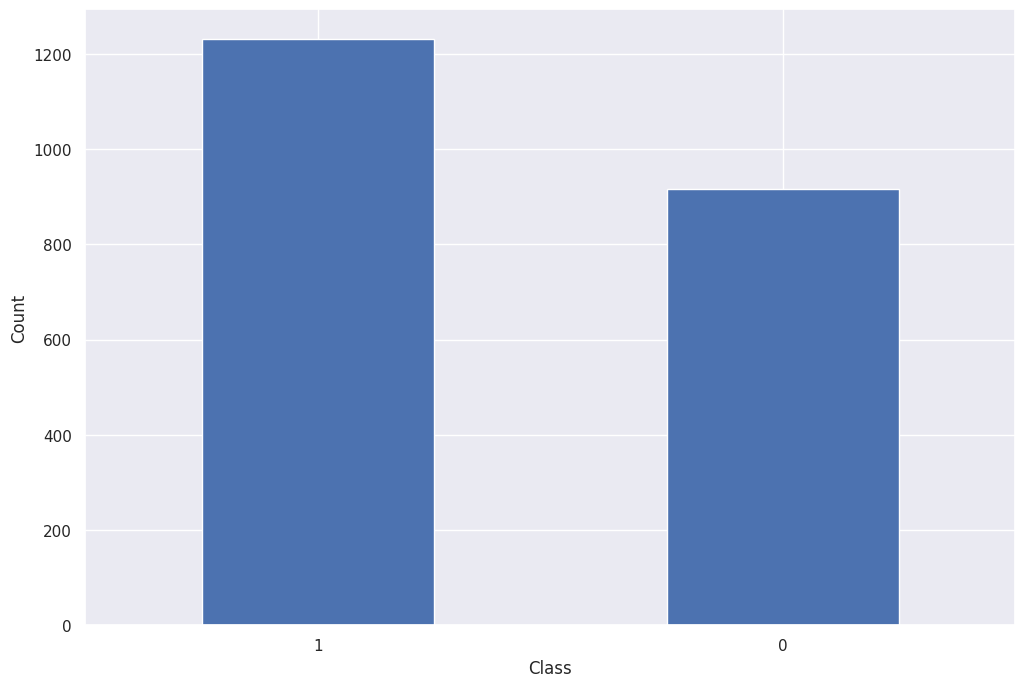

In [ ]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

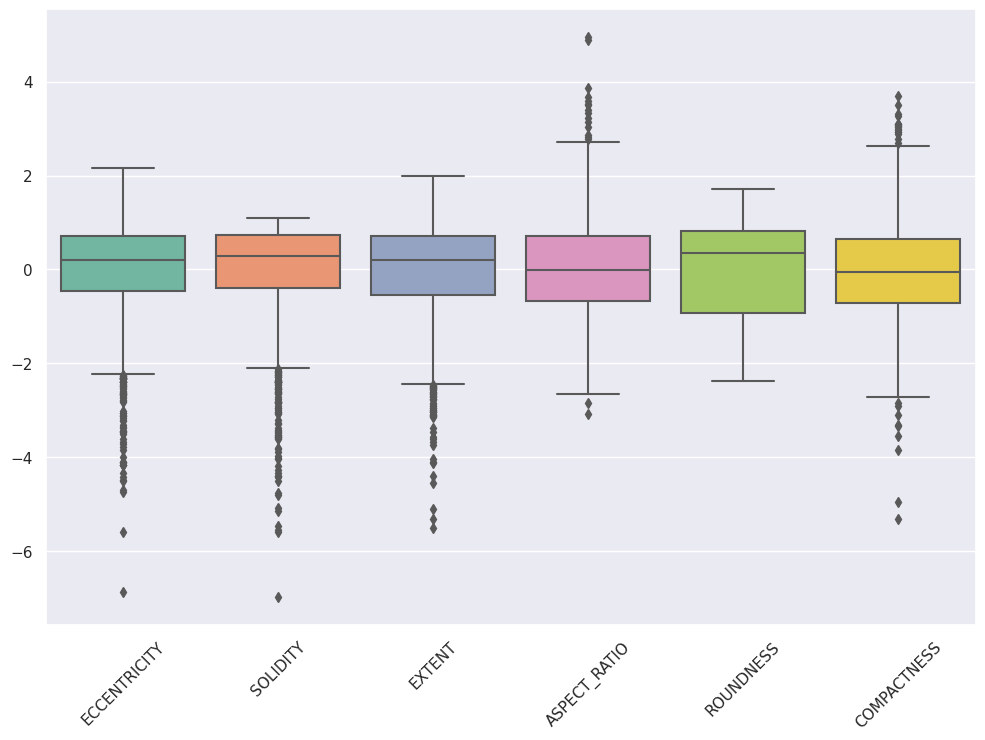

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=dp, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


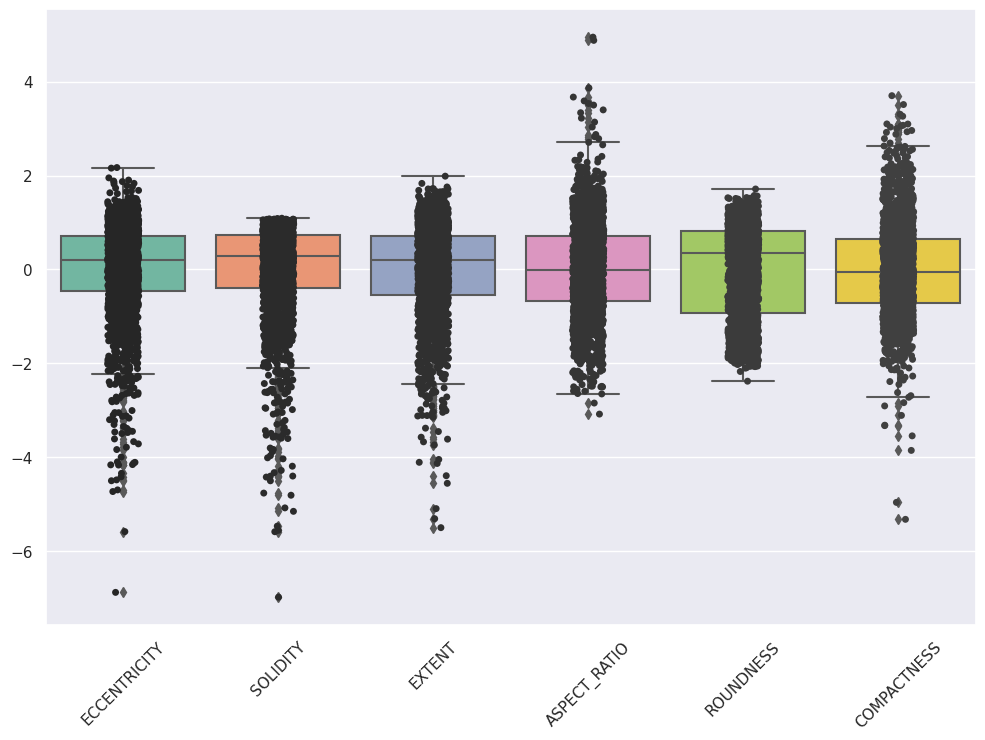

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=dp, orient="v", palette="Set2")
ax = sns.stripplot(data=dp, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

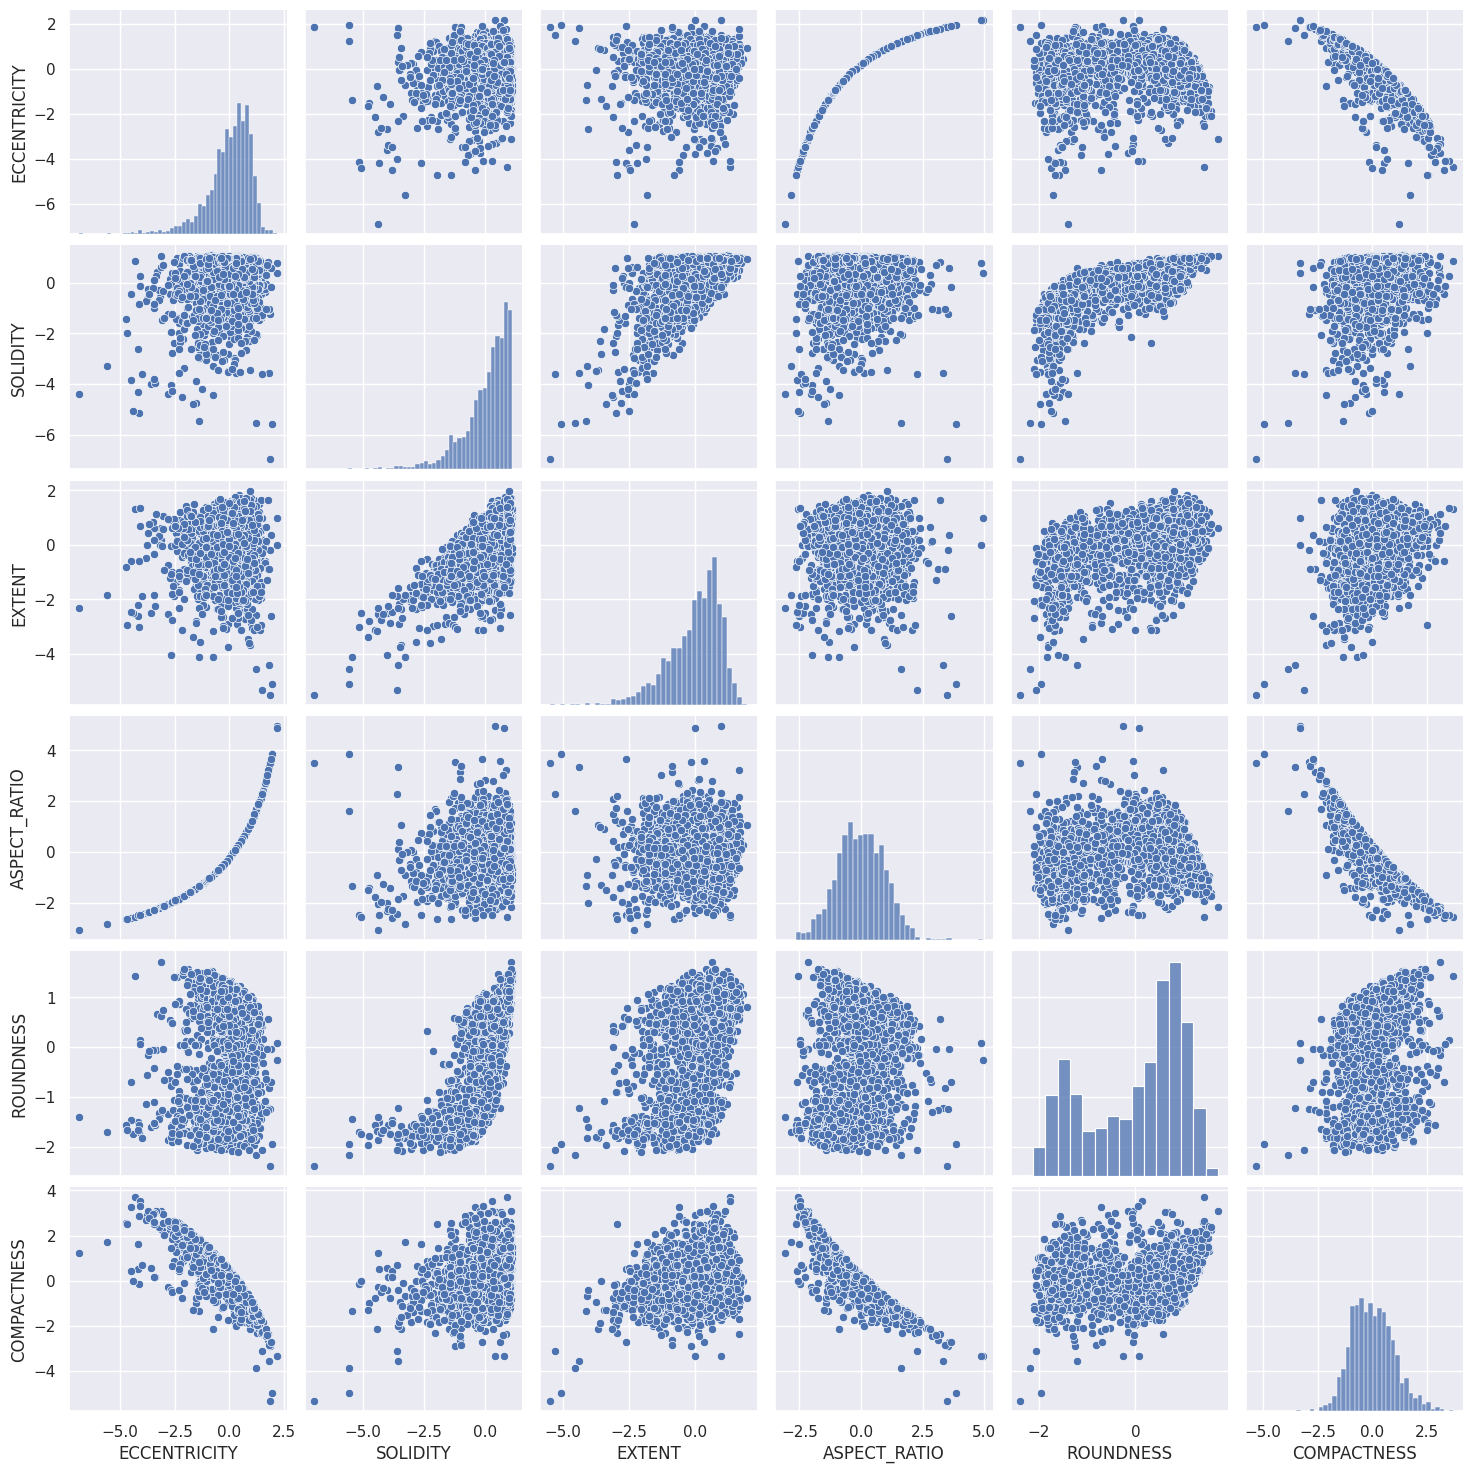

In [ ]:
sns.pairplot(dp)
plt.show()

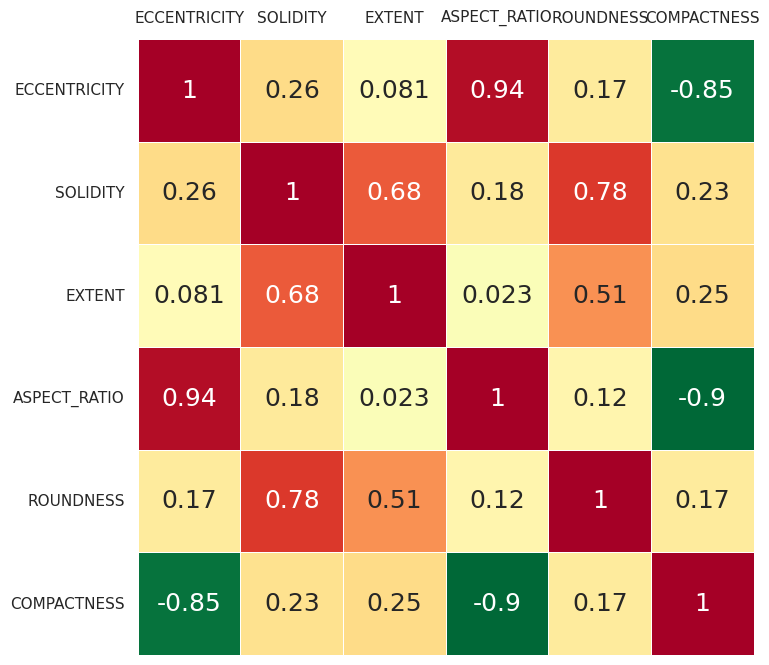

In [ ]:
dfc = dp - dp.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

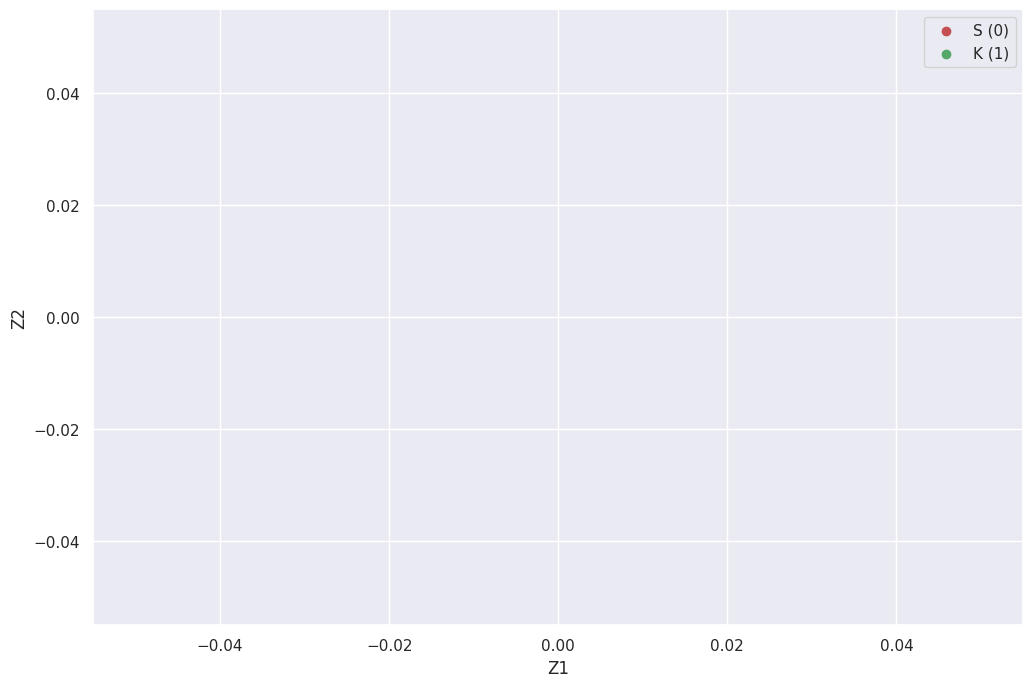

In [ ]:
pca = PCA()
pca.fit(dp)
Z = pca.fit_transform(dp)

# 1(Siit_pisstachio)->0,  2(kirmizi_pistachio)->1,
idx_S = np.where(y == 0)
idx_K = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_S,0], Z[idx_S,1], c='r', label='S (0)')
plt.scatter(Z[idx_K,0], Z[idx_K,1], c='g', label='K (1)')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

pca = PCA()
pca.fit(dp)
Z = pca.fit_transform(dp)



array([[ 5.96521409e-02, -1.04198516e-01,  1.40179421e-01,
        -4.45511407e-02, -9.37283506e-02, -9.15895654e-01,
        -3.41026926e-01],
       [-9.81523048e-03, -1.71795591e-01, -5.85233782e-02,
        -4.28634323e-01, -7.92327918e-01, -3.43662376e-02,
         3.92776017e-01],
       [-9.86949931e-03, -1.10812711e-01, -7.10842121e-02,
        -8.59852319e-01,  4.93125691e-01, -6.27050528e-03,
        -3.44866574e-03],
       [ 3.12391241e-01, -4.81983787e-01,  7.80847610e-01,
        -1.04094051e-02, -5.35950294e-03,  2.28813392e-01,
        -8.88127402e-02],
       [-3.92130671e-02, -8.34993894e-01, -4.98841018e-01,
         2.05904669e-01,  9.86141244e-02,  2.20240175e-03,
        -1.66985664e-02],
       [-6.04903591e-02,  2.96405296e-02, -1.54873143e-01,
        -1.79816134e-01, -3.32185652e-01,  3.27942576e-01,
        -8.49263906e-01],
       [ 9.45231633e-01,  1.30183533e-01, -2.98865750e-01,
        -1.01425590e-02, -1.25595522e-02,  2.83566981e-03,
        -1.2549491

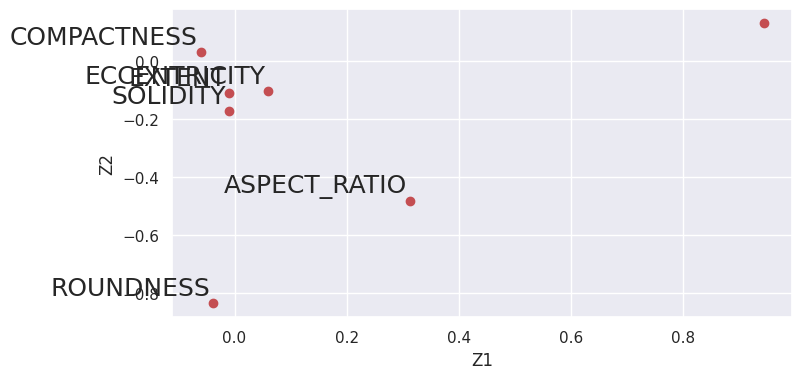

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Load the data
data = pd.read_csv('/content/Pistachio.csv')

# Create the PCA model
pca = PCA()

# Fit the PCA model to the data
pca.fit(data)

A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('Z1')
plt.ylabel('Z2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


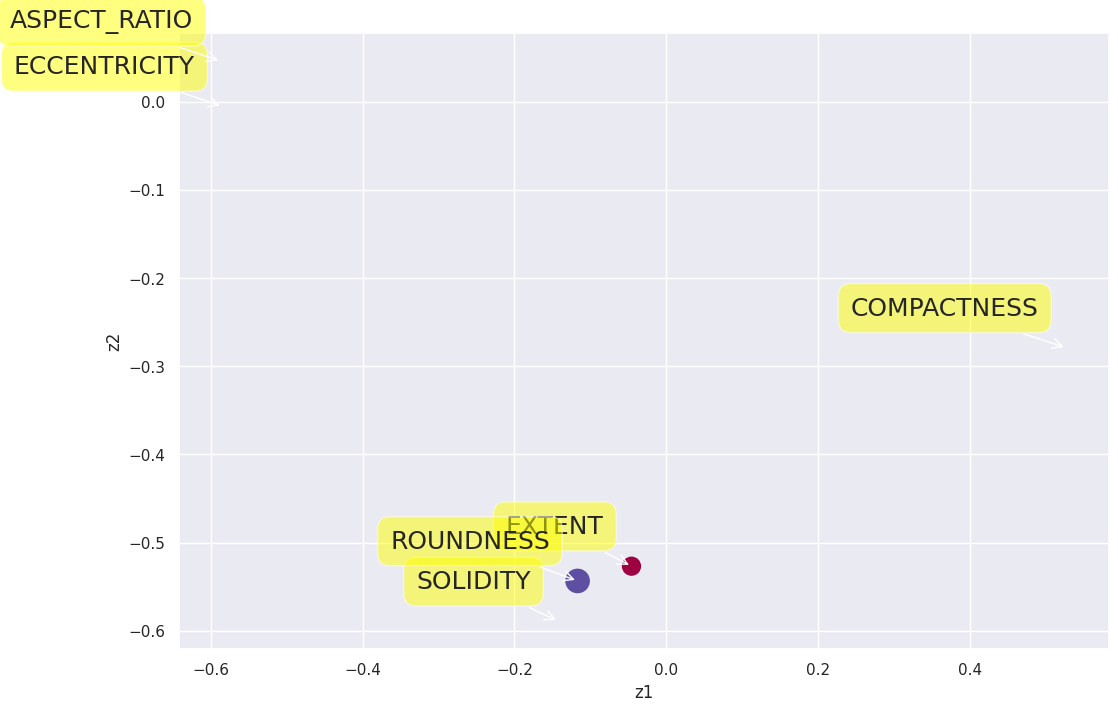

In [ ]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('z1')
plt.ylabel('z2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Eigenvalues:
[2.69762794e-01 5.30648778e-02 3.11305942e-02 2.39304925e-03
 6.38037710e-04 2.55892784e-04 3.98632181e-05]


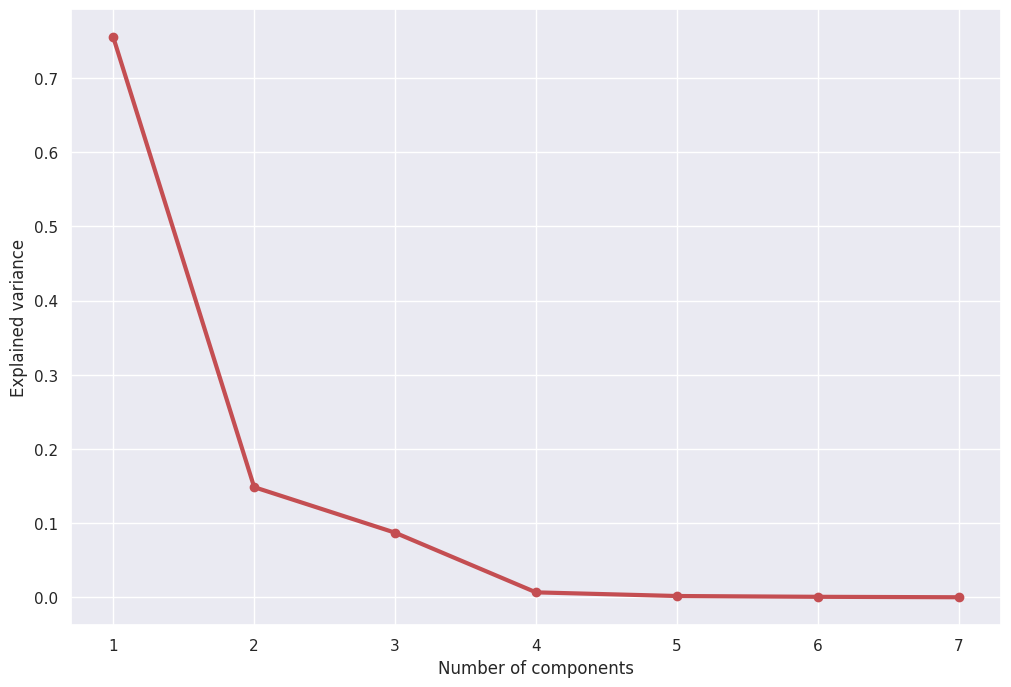

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_
print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Text(0, 0.5, 'Cumulative explained variance')

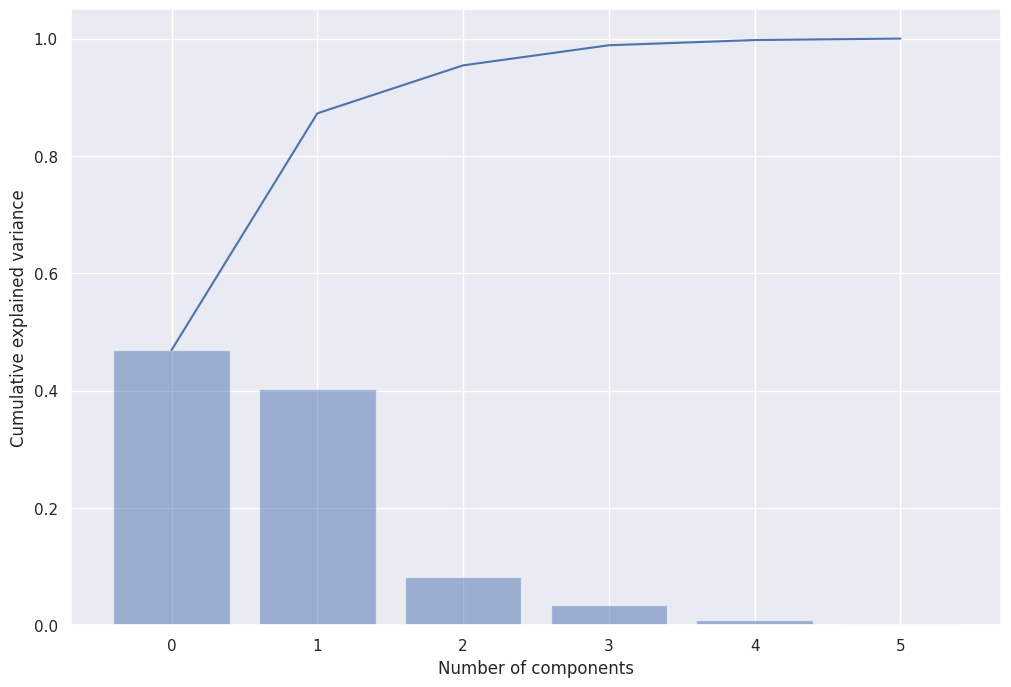

In [ ]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:

PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (46.9%)',
 '1': 'PC 2 (40.4%)',
 '2': 'PC 3 (8.2%)',
 '3': 'PC 4 (3.4%)',
 '4': 'PC 5 (0.9%)',
 '5': 'PC 6 (0.2%)'}

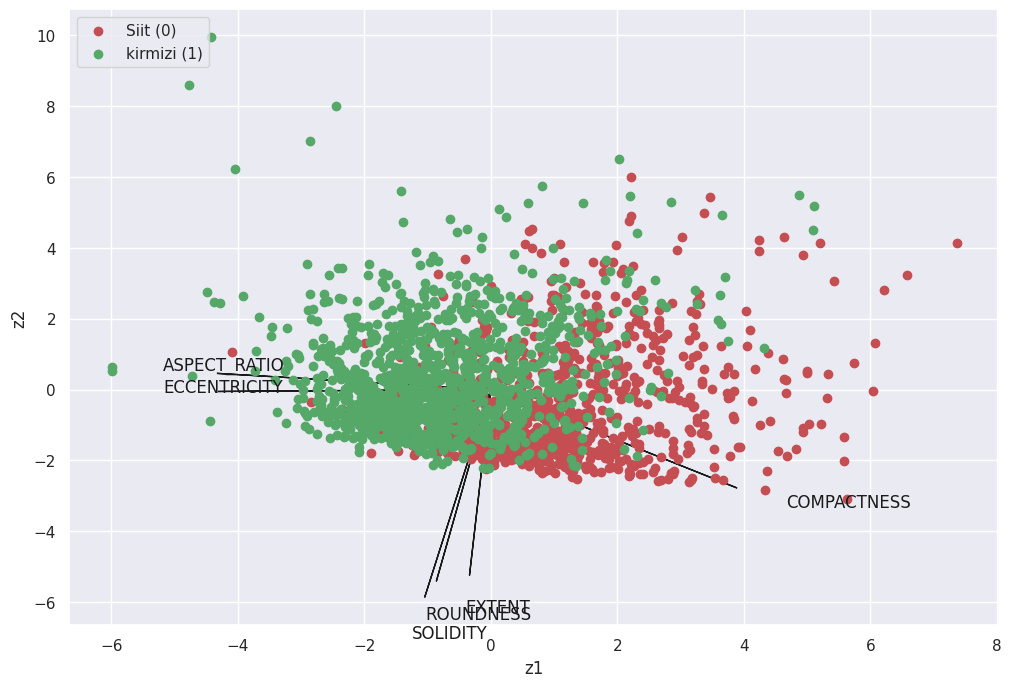

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('z1')
plt.ylabel('z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_S,0], Z[idx_S,1], c='r', label='Siit (0)')
plt.scatter(Z[idx_K,0], Z[idx_K,1], c='g', label='kirmizi (1)')

plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [ ]:

!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.2 MB/s eta 0:00:00


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(dp)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [ ]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC       feature   loading  type
0  PC1  ASPECT_RATIO -0.586668  best
1  PC2      SOLIDITY -0.589181  best
2  PC3        EXTENT -0.782290  best
3  PC1  ECCENTRICITY -0.584489  weak
4  PC3     ROUNDNESS  0.609183  weak
5  PC1   COMPACTNESS  0.527630  weak


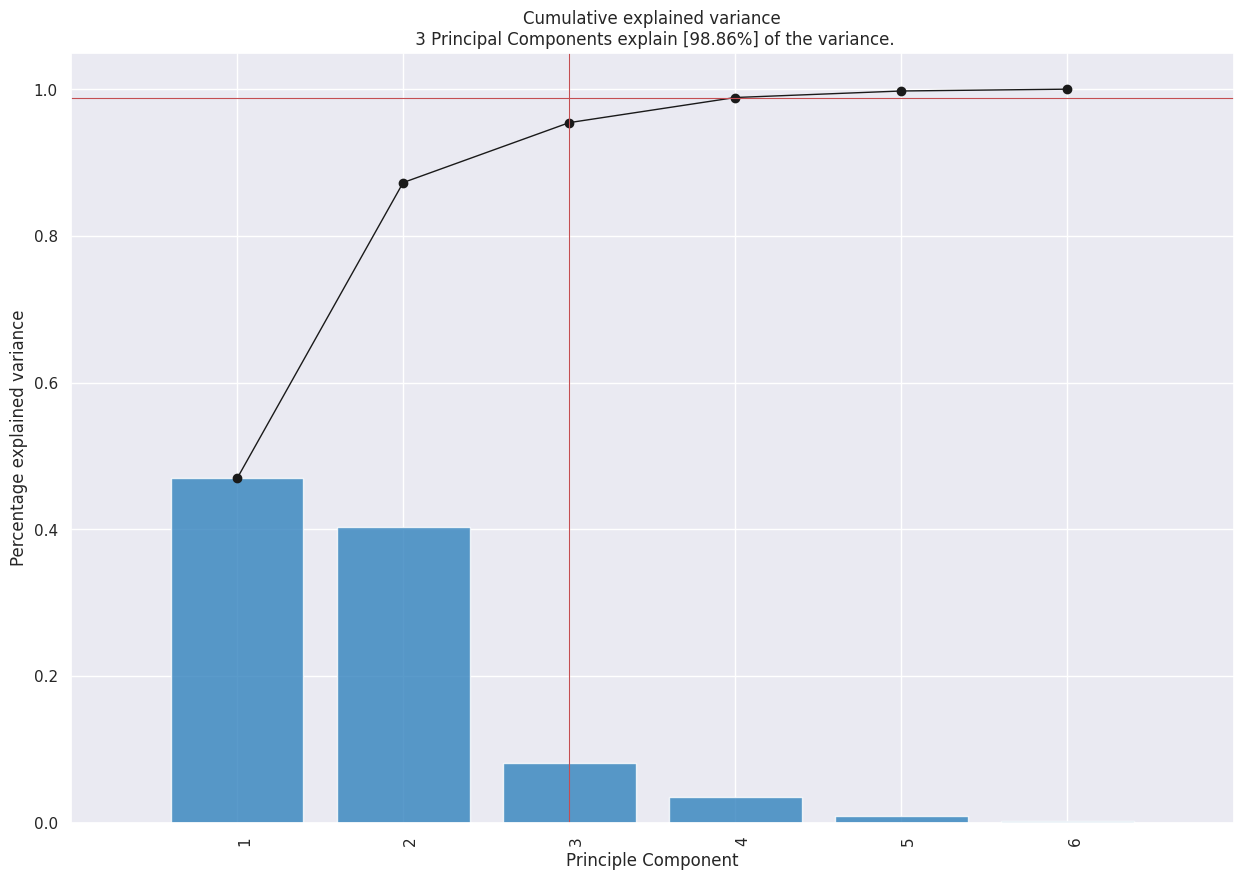

In [ ]:

model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


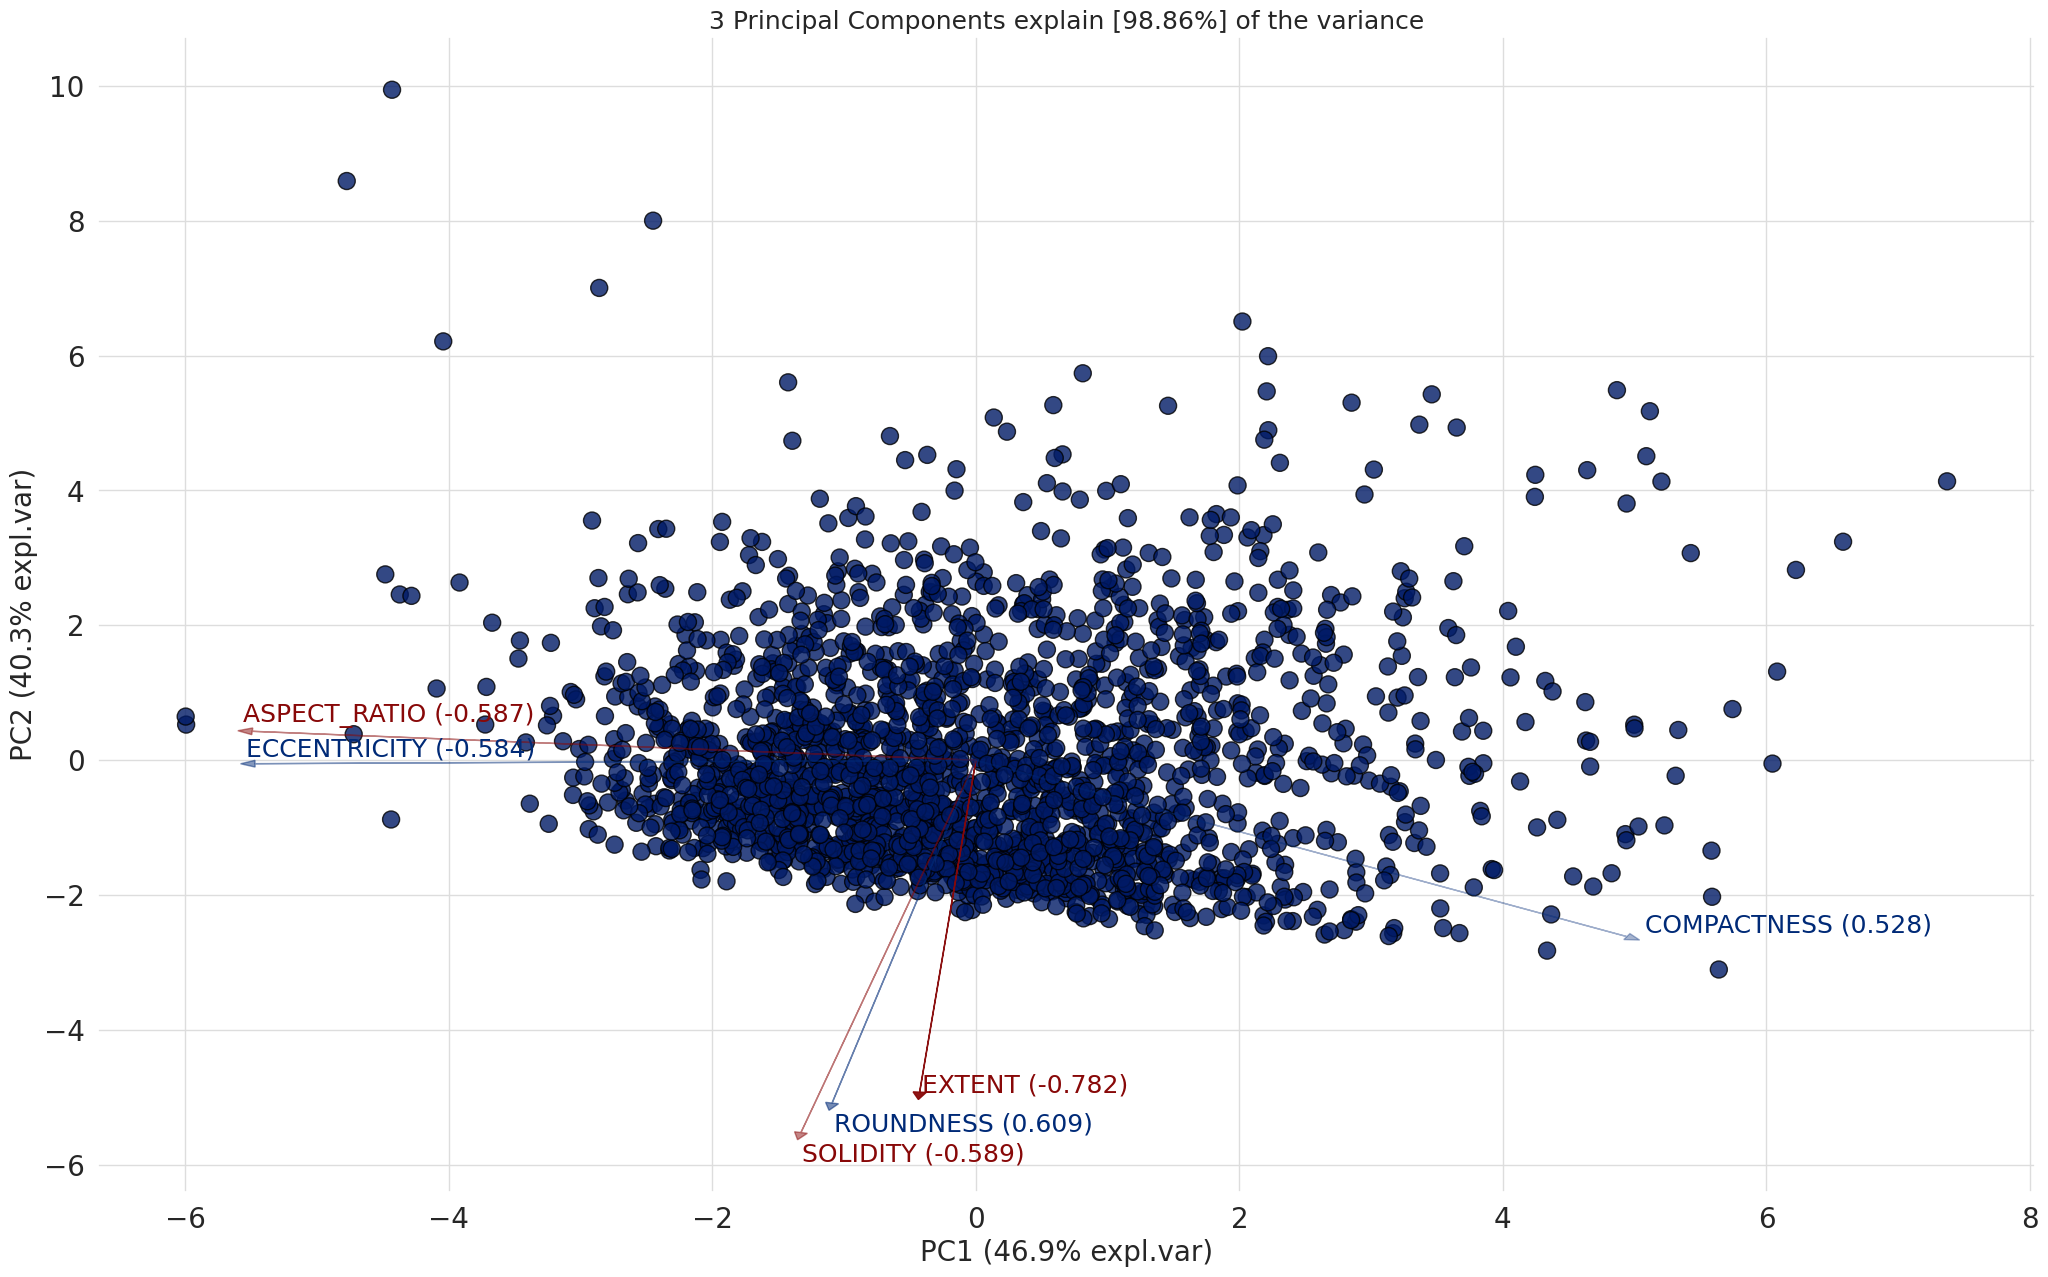

In [ ]:

 ax = model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [98.86%] of the variance'}, xlabel='PC1 (46.9% expl.var)', ylabel='PC2 (40.3% expl.var)'>)

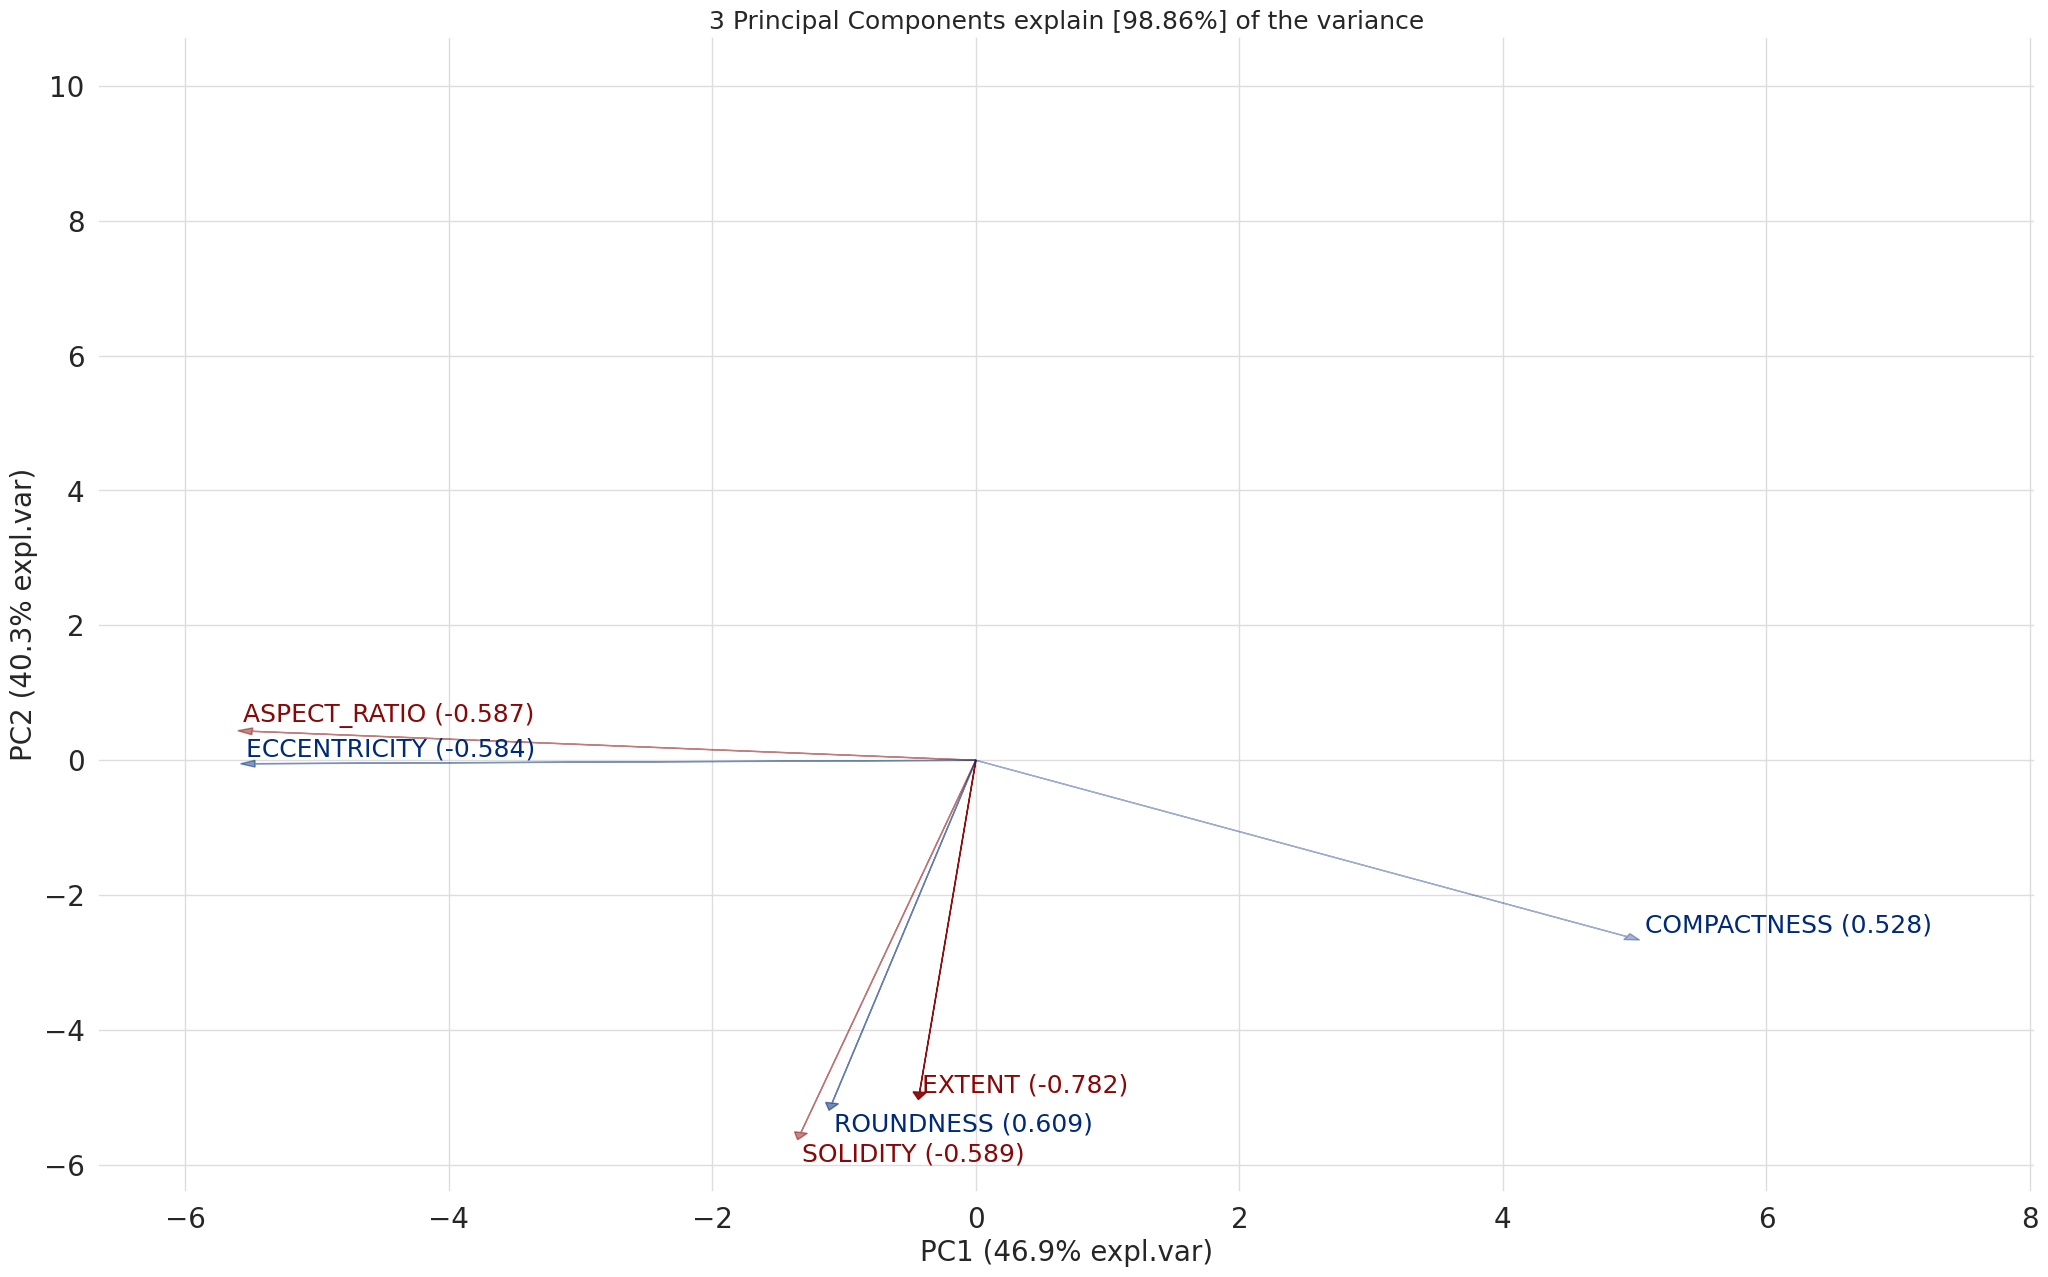

In [ ]:

model.biplot(cmap=None, label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


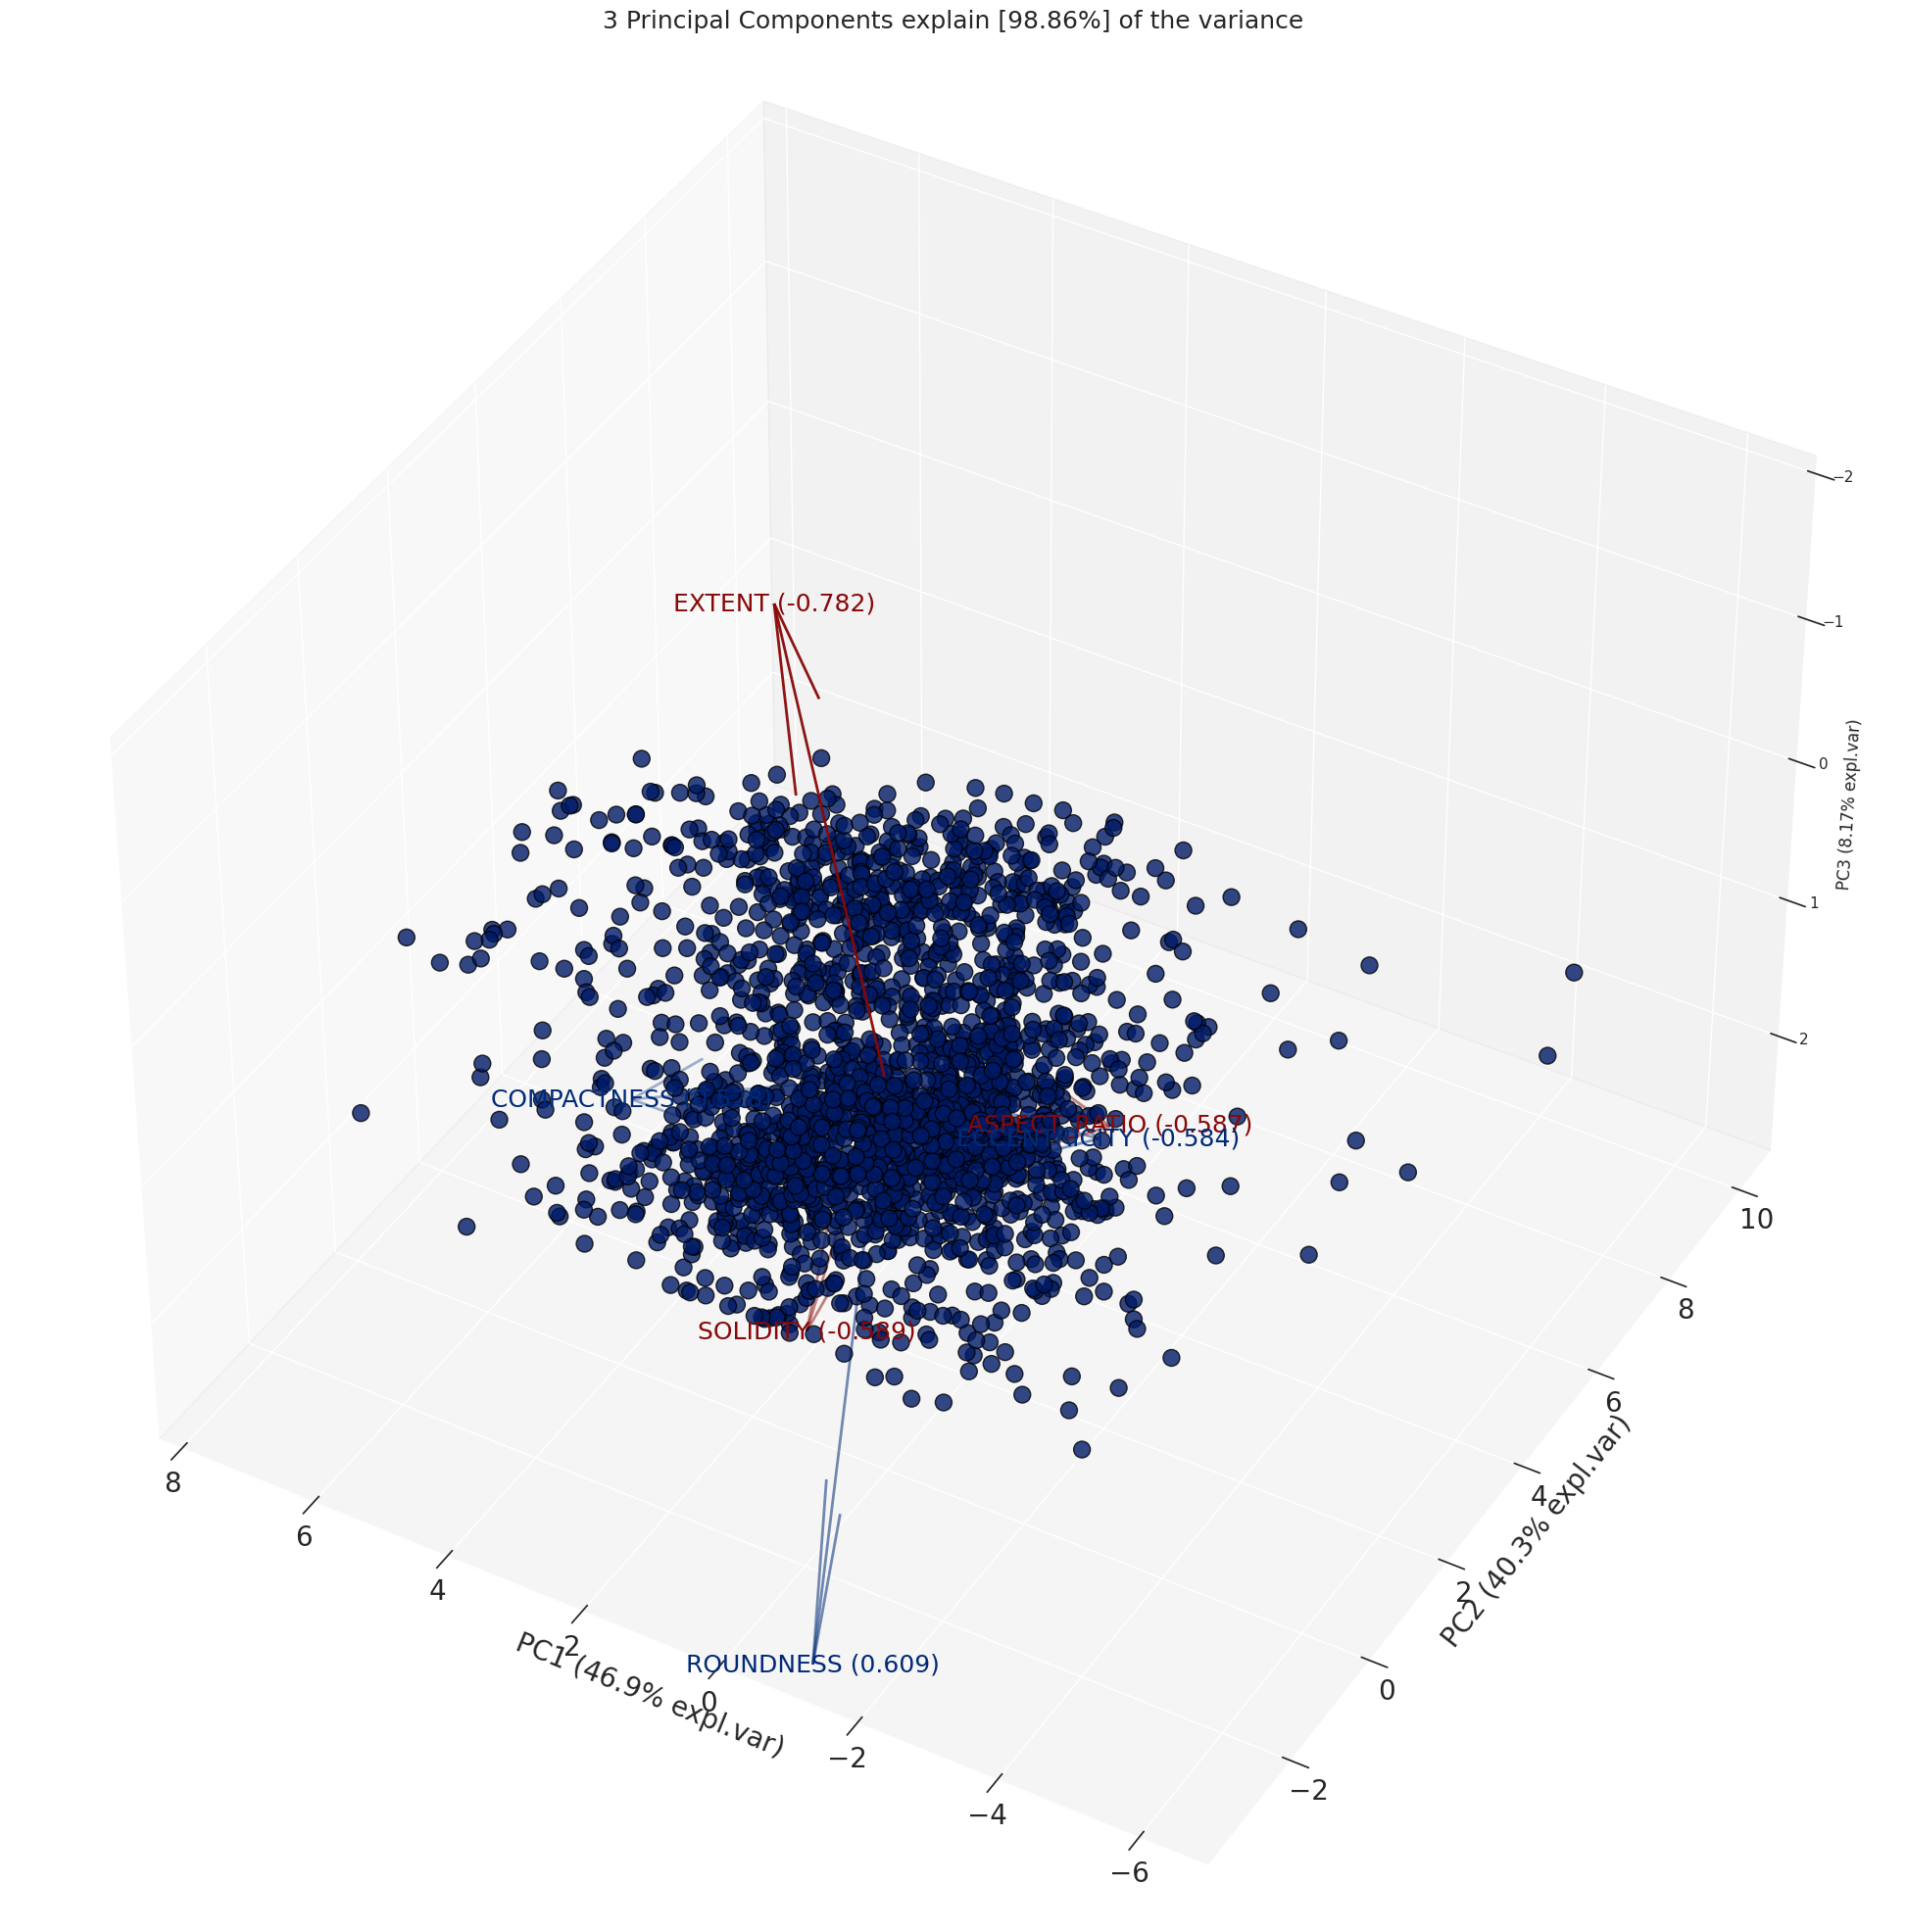

In [ ]:
ax = model.biplot3d(legend=False)

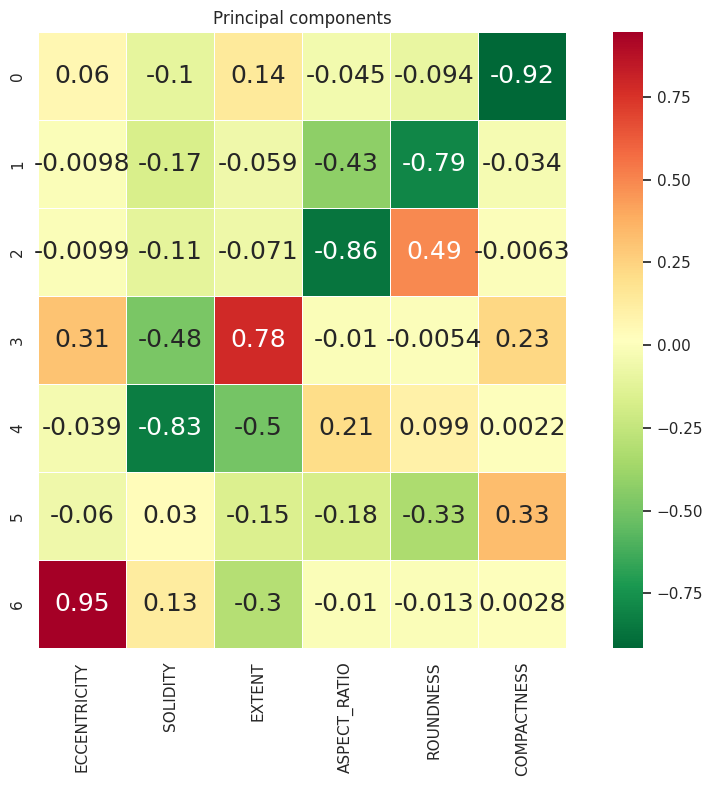

PC1:[-0.58448892 -0.14173142 -0.04569359 -0.5866676  -0.11672706  0.52762953]
PC2:[-0.00543704 -0.58918131 -0.5267369   0.04586771 -0.54347299 -0.27913676]


In [ ]:
comps = pd.DataFrame(A[:, :-1], columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True,
            cbar=True, square=True)
ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

In [ ]:
dp = pd.read_csv('/content/Pistachio.csv')


In [ ]:
y = dp['Class']
target = dp['Class'].to_numpy()

pca_data = PCA()
pca_data.fit(dp)
Z = pca_data.fit_transform(dp)

In [ ]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(dp, y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 1503
Test Dataset Size: 645


Gaussian

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000     1.000       645



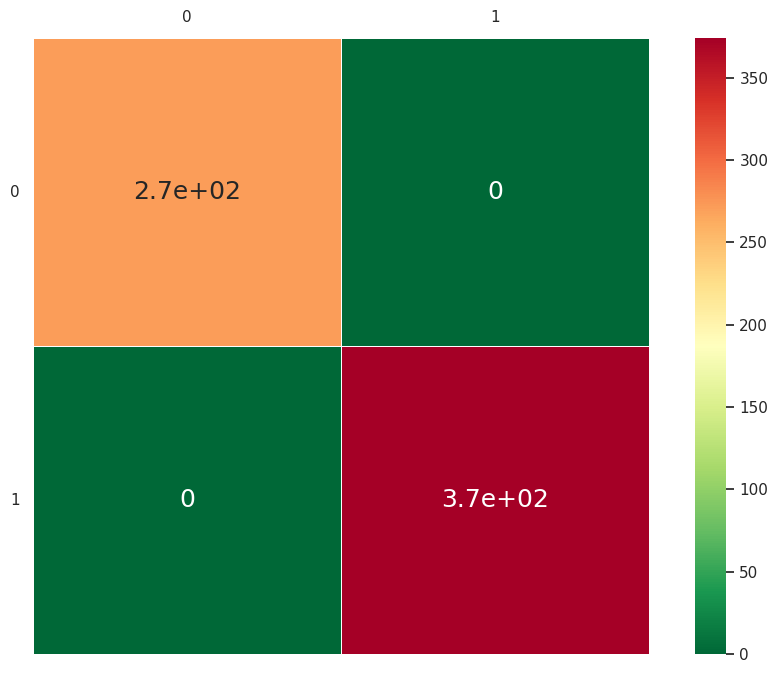

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000     1.000       645



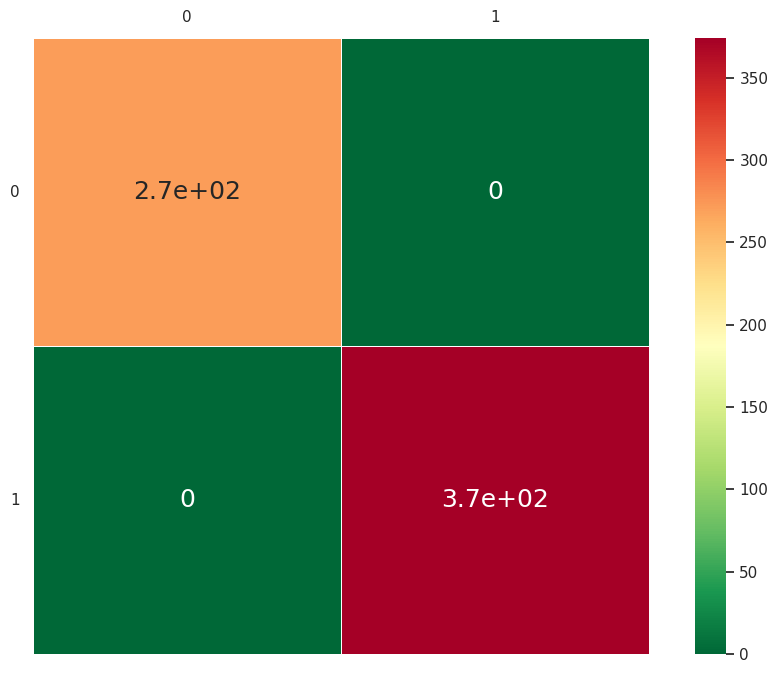

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000     1.000       645



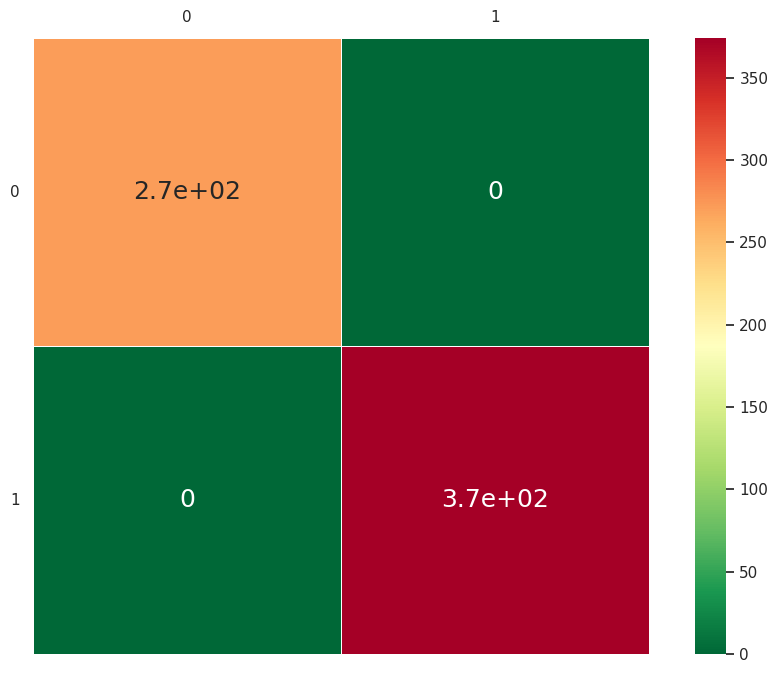

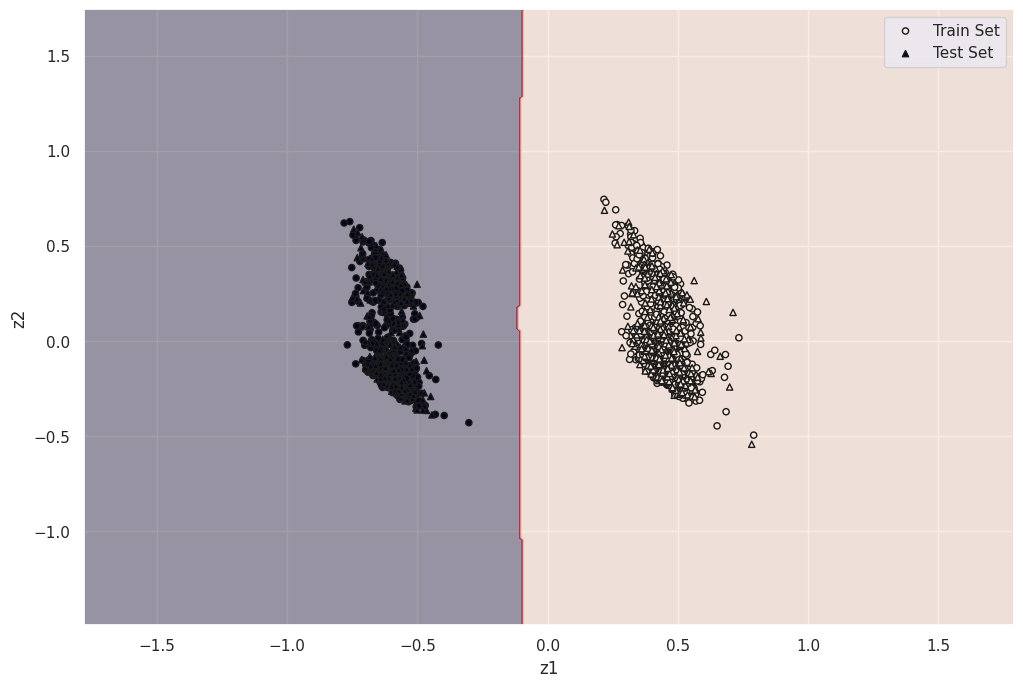

(array([], dtype=int64),)


In [ ]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))


KNN

Grid Search Results:
k_full_data: {'n_neighbors': 2}
k_Z: {'n_neighbors': 2}
k_Z12: {'n_neighbors': 2}
                                    0         1         2         3         4
knn_full_data fit_time       0.005411  0.005846  0.005487  0.005520  0.005337
knn_Z  fit_time              0.002823  0.002938  0.002846  0.003072  0.002909
knn_Z12 fit_time             0.002195  0.002228  0.002306  0.002346  0.002302
knn_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
knn_Z  test_f1_macro         1.000000  1.000000  1.000000  1.000000  1.000000
knn_Z12 test_f1_macro        1.000000  1.000000  1.000000  1.000000  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000   

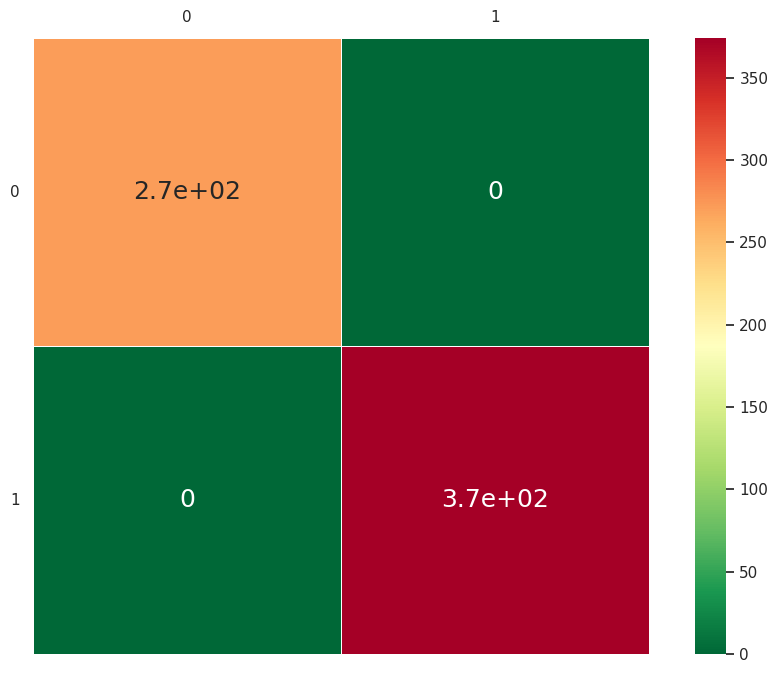

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000     1.000       645



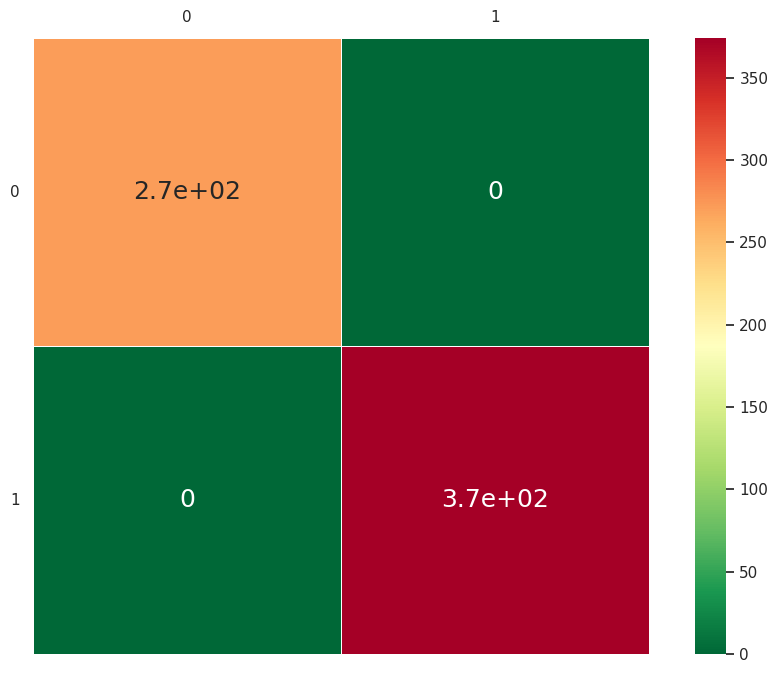

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000     1.000       645



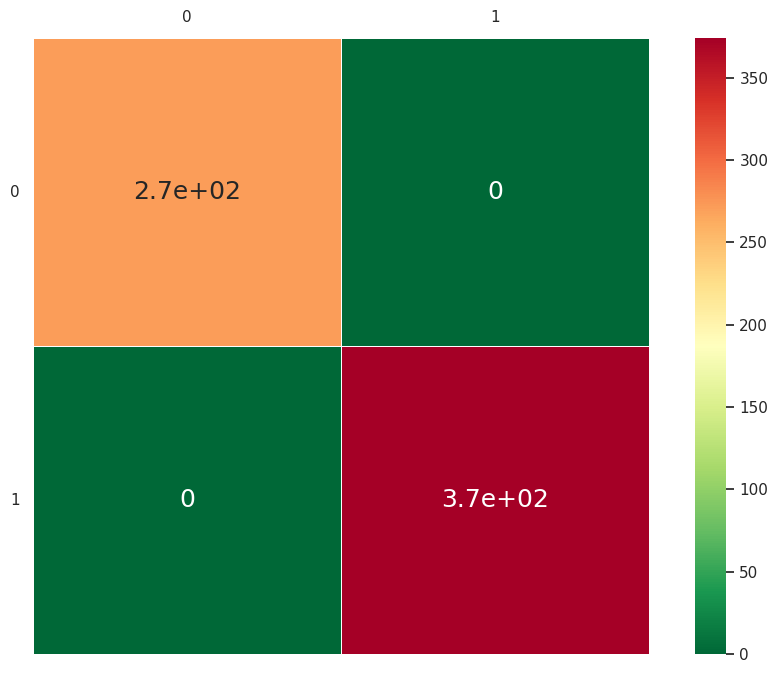

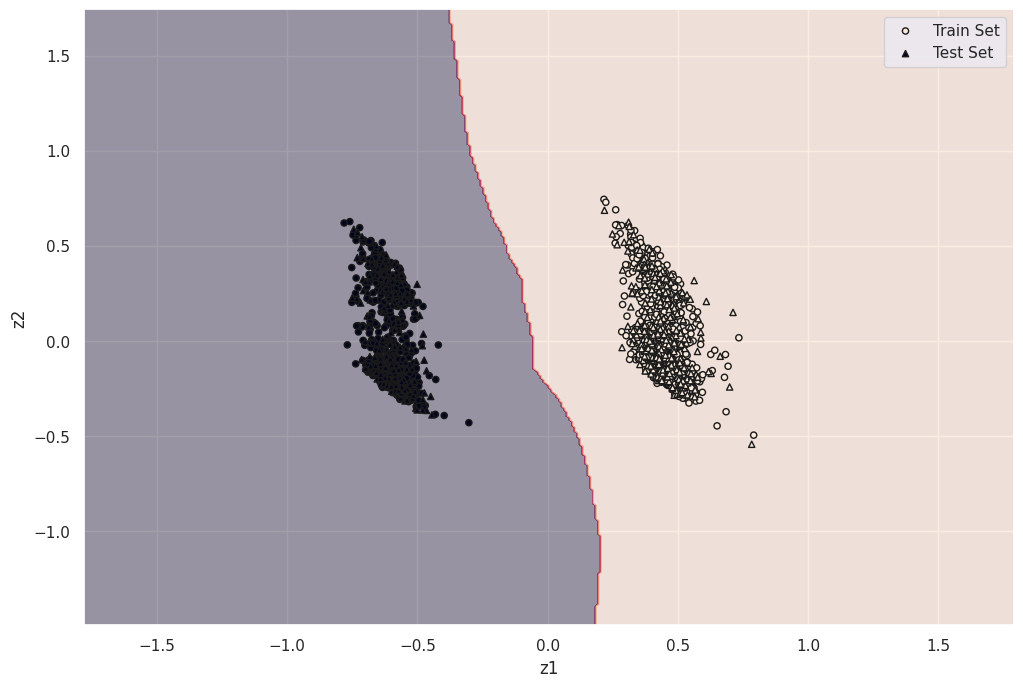

In [ ]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

DT

Grid Search Results:
depth_full_data: {'max_depth': 2}
depth_Z: {'max_depth': 2}
depth_Z12: {'max_depth': 2}
                                   0         1         2         3         4
dt_full_data fit_time       0.009285  0.005836  0.010199  0.005358  0.005003
dt_Z  fit_time              0.003107  0.003206  0.003085  0.003173  0.003005
dt_Z12 fit_time             0.002119  0.001938  0.001833  0.001990  0.001917
dt_full_data test_f1_macro  1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z  test_f1_macro         1.000000  1.000000  1.000000  1.000000  1.000000
dt_Z12 test_f1_macro        1.000000  1.000000  1.000000  1.000000  1.000000

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000    

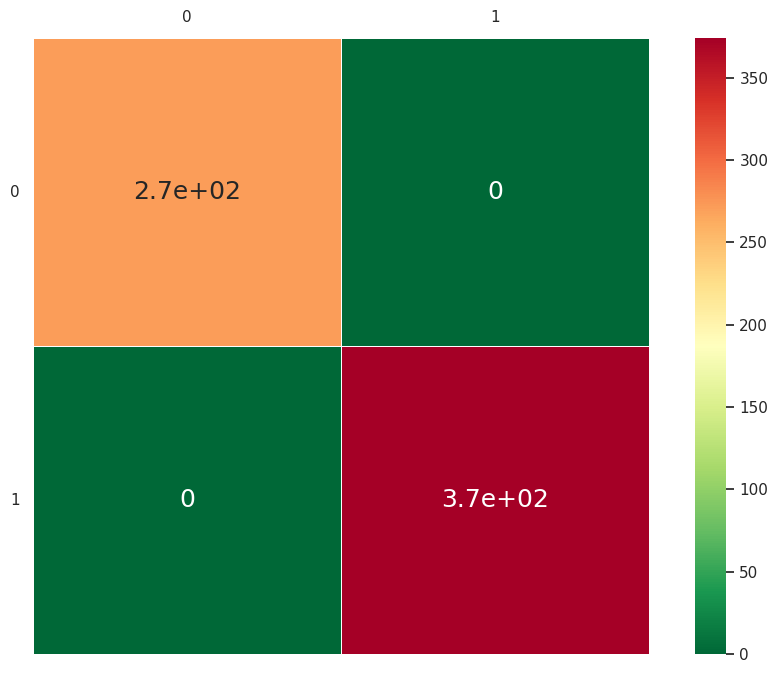

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000     1.000       645



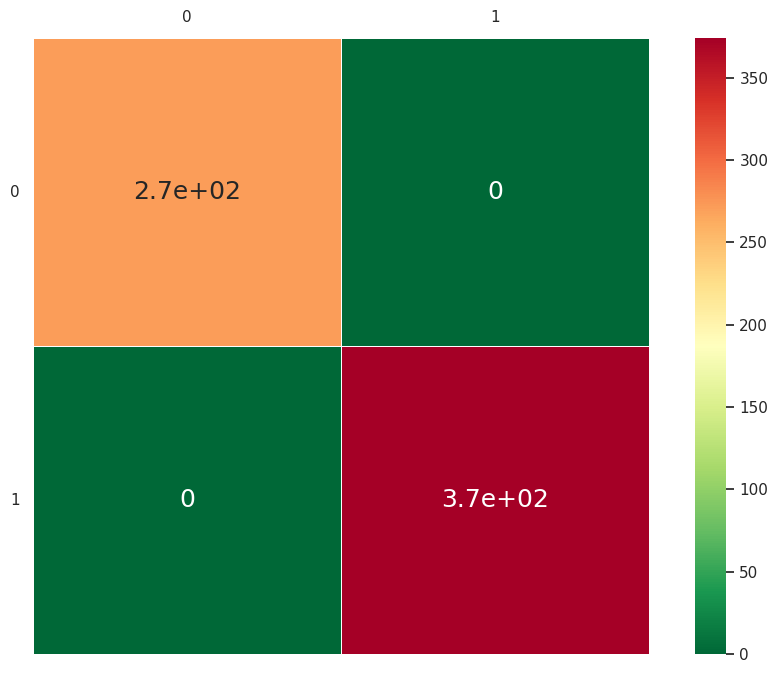

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000       271
           1      1.000     1.000     1.000       374

    accuracy                          1.000       645
   macro avg      1.000     1.000     1.000       645
weighted avg      1.000     1.000     1.000       645



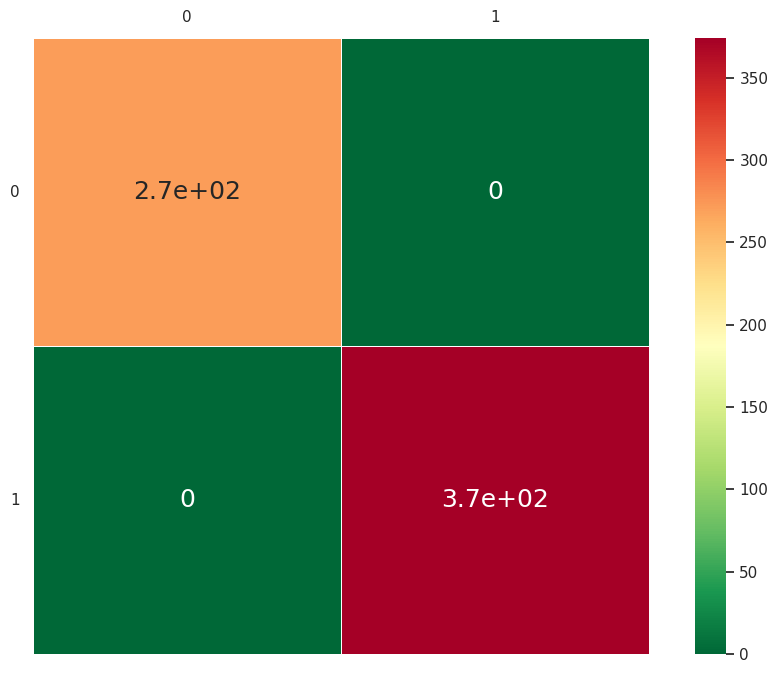

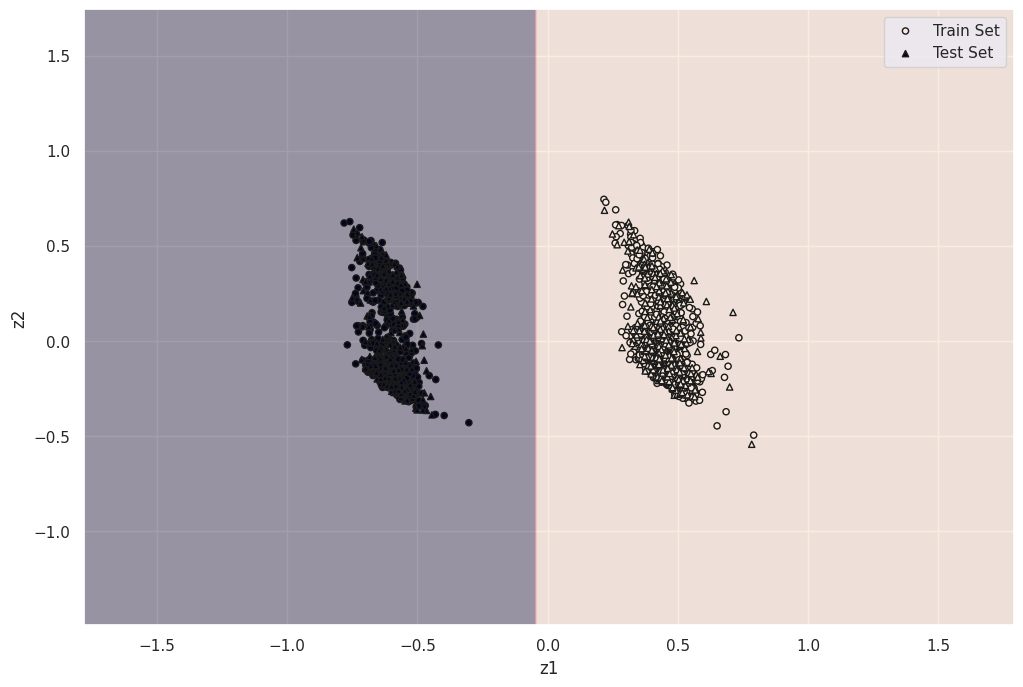

In [ ]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('z1')
    plt.ylabel('z2')
    plt.legend()
    plt.show()

# New Section